**Wine Quality Classification by Unsupervised ML Methods**

Created on Google Colab.

Objective is to cluster wines based on their quality and determine which features contribute to wine quality, using primary unsupervised learning methods of K-menas clustering, Hierarchical Clustering and PCA Analysis. Data is from a publicly available data archive for ML coursework.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Reading the red wine file and checking the top few rows of the data file to understand the structure.

red = pd.DataFrame(pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';'))
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

#Scaling the data

red_scaled = pd.DataFrame(scale(red), index=red.index, columns=red.columns)

In [ ]:
#fitting k-means clustering, setting number of clusters to 3 randomly.

km1 = KMeans(n_clusters=3, n_init=20)
km1.fit(red_scaled)
red_scaled['cluster'] = km1.labels_
display(red_scaled.groupby('cluster').mean())

#cluster 2 is the best, cluster 1 is intermediate and cluster 0 is the worst quality wine. 
# alcohol rate and sulfur dioxide are likely to contribute to the wine quality since they follow the similar pattern with quality clustering. 
# note that the values of each feature are on standardized scale. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.064045,0.050084,0.099918,0.361867,-0.002867,1.024745,1.267761,0.296404,-0.171839,-0.181772,-0.546743,-0.437077
1,0.948582,-0.731324,1.008170,0.037305,0.241678,-0.432296,-0.466686,0.364027,-0.728786,0.587733,0.379856,0.561225
2,-0.646621,0.498127,-0.781045,-0.228904,-0.172255,-0.261240,-0.372202,-0.427385,0.620225,-0.321298,0.032046,-0.159665


Text(0.5, 1.0, 'Elbow curve')

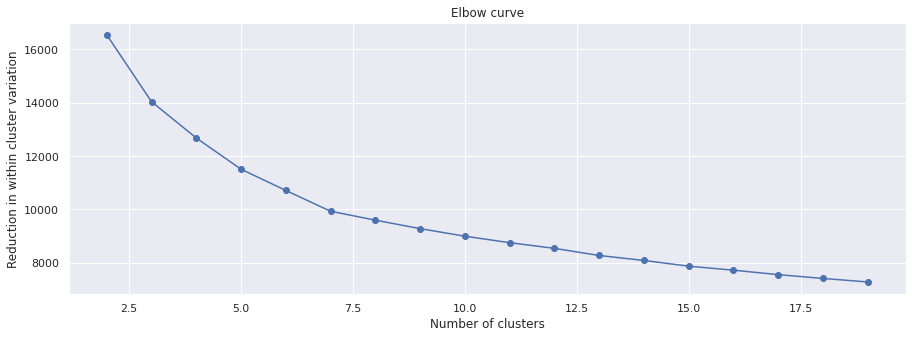

In [ ]:
#Using elbow curve approach to determine the optimum number of clusters, which is found to be 5 below.

within_cluster_variance = []
from sklearn.metrics import pairwise_distances_argmin
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(red_scaled)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')  

In [ ]:
#k-means clustering with 5 clusters

np.random.seed(4)
km2 = KMeans(n_clusters=5, n_init=20)
km2.fit(red_scaled)
red_scaled['cluster'] = km2.labels_
display(red_scaled.groupby('cluster').mean())

#lower volatilie acidity and higher alcohol are clustered under better quality wines, which are clusters 2 and 4.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.069954,0.088045,0.076170,0.387805,0.009027,1.006065,1.269162,0.355323,-0.148313,-0.182081,-0.598762,-0.455977
1,-0.637730,-0.463139,-0.131595,-0.228236,-0.396437,0.117600,-0.242747,-1.190841,0.560208,0.188748,1.276404,0.874713
2,1.335952,-0.676338,1.128780,0.153920,-0.008809,-0.545055,-0.532427,0.780706,-0.845791,0.342206,0.197450,0.413519
3,-0.515495,0.668984,-0.824084,-0.231692,-0.082348,-0.405493,-0.426621,-0.124971,0.464779,-0.419300,-0.388879,-0.439961
4,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695


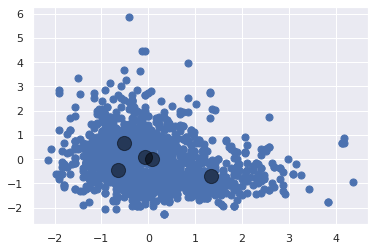

In [ ]:
# visualizing cluster centers

plt.scatter(red_scaled.iloc[:, 0], red_scaled.iloc[:, 1], s=50, cmap='viridis')
centers = km2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Hierarchical Clustering with complete linkage. Number of clusters is chosen 5 from the elbow curve above.

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(red_scaled)    

In [ ]:
red_scaled['cluster'] = ac.labels_
display(red_scaled.groupby('cluster').mean())

#alcohol rate is still clustered with better wine quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.000987,0.017364,-0.034363,-0.065882,-0.108317,-0.031351,-0.041710,-0.007461,0.053300,-0.089000,0.016765,-0.000388
1,0.295601,-0.175857,0.886735,-0.370158,3.432669,-0.239944,0.207538,0.210146,-1.497447,3.378988,-0.639724,-0.062747
2,-0.244286,-0.278011,0.174717,6.231640,0.600538,2.121151,1.318701,1.428969,-0.176394,-0.212014,-0.511769,-0.099672
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.707102,-1.514795,0.753836,0.406038,-0.907295,2.089274,3.432125,-2.718977,-1.288670,-1.123438,1.302998,0.863739


In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform
row_clusters = linkage(pdist(red_scaled, metric='euclidean'), method='complete')

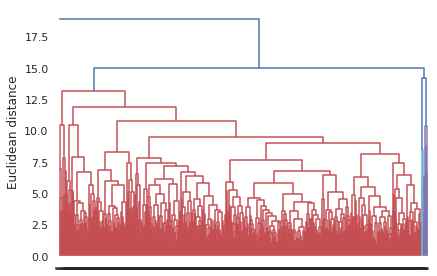

In [ ]:
#using dendrogram for visualizing hierarchical clustering. 

from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels = labels,
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#Principal Components Analysis to reduce the components.

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(red_scaled)
red_pca1 = pca.transform(red_scaled) 
print("original shape:   ", red_scaled.shape)
print("transformed shape:", red_pca1.shape)

original shape:    (1599, 13)
transformed shape: (1599, 1)


In [ ]:
print(pca.explained_variance_)

[3.12810593]


In [ ]:
pca = PCA(n_components=2) 
pca.fit(red_scaled)
print(pca.explained_variance_)

# The first principle component vector is able to explain 3.1 and the second one is able to explain 2.26 out of total variance of the data. 

[3.12810593 2.24602899]


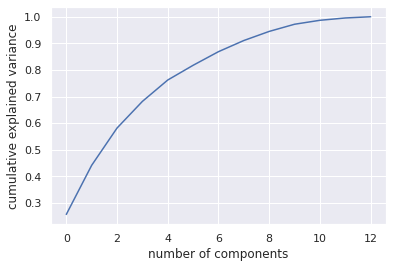

In [ ]:
pca = PCA().fit(red_scaled)  
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# 2 principal component vectors explain about 60% of the total variance in the data